Разработать скрипт, который будет с адекватным качеством находить границы листа бумаги на фотографии (лист бумаги лежит на столе, контрастность достаточная). 

Обучающий датасет не предоставляется. 



**Решение задачи**

Сперва подключим все необходимые библиотеки.
Будем пользоваться библиотекой cv2 - библиотекой компьютерного зрения, которая предназначена для анализа, классификации и обработки изображений.

In [11]:
import numpy as np
import argparse
import cv2
import imutils
from google.colab.patches import cv2_imshow

In [106]:
def draw_borders(img) :    
    # Загрузка изображения
    image = cv2.imread(img)

    # Пересчитываем размеры изображения, чтоб было проще вычислять
    image = imutils.resize(image, height = 500)

    # Меняем оттенок изображения на серую гамму, чтоб конраст белого виднелся четче
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Блюрим изображение
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Определяем края с помощью метода Canny
    edges = cv2.Canny(gray, 25, 100)

    # Оставим все контуры
    contours = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    # Возьмем топ-3 контура по площади
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    contours = contours[:3]
    for cont in contours:

      # Вычисляем периметр
      perimetr = cv2.arcLength(cont, True)
      primerno = cv2.approxPolyDP(cont, 0.01 * perimetr, True)

      # Если есть 4 точки, считаем, что нашли листок
      screenCnt = primerno
      if len(primerno) == 4:
        screenCnt = primerno
        break
      
    print("Вывод границ листа с фотографии " + img)

    cv2.drawContours(image, [screenCnt], -1, (255, 0, 0), 4)
    cv2_imshow(image)

In [104]:
img_names = ["list2.jpg", "simple_list.jpg", "blurred_list.jpg", "crumpled_list.jpg", "list1.jpg"]

Вывод границ листа с фотографии list2.jpg


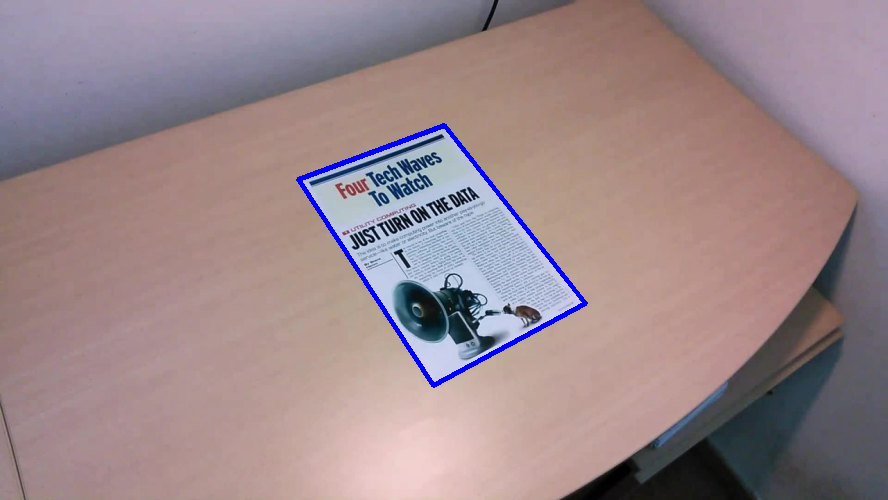

Вывод границ листа с фотографии simple_list.jpg


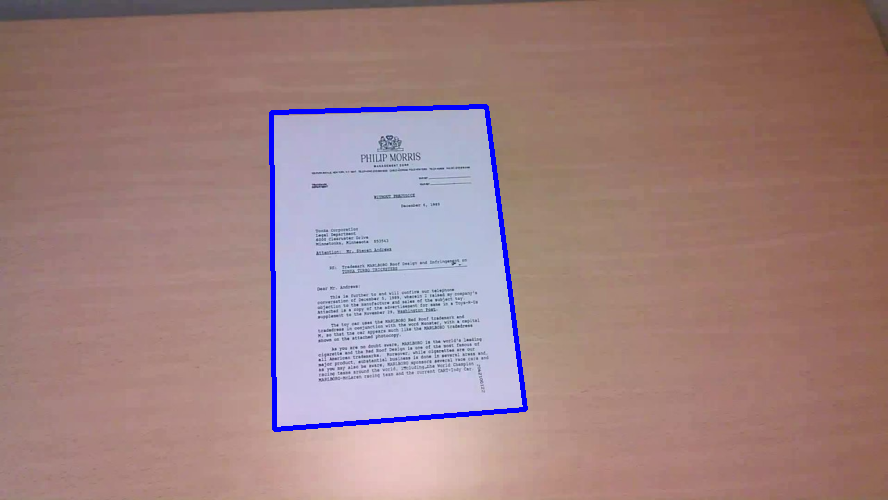

Вывод границ листа с фотографии blurred_list.jpg


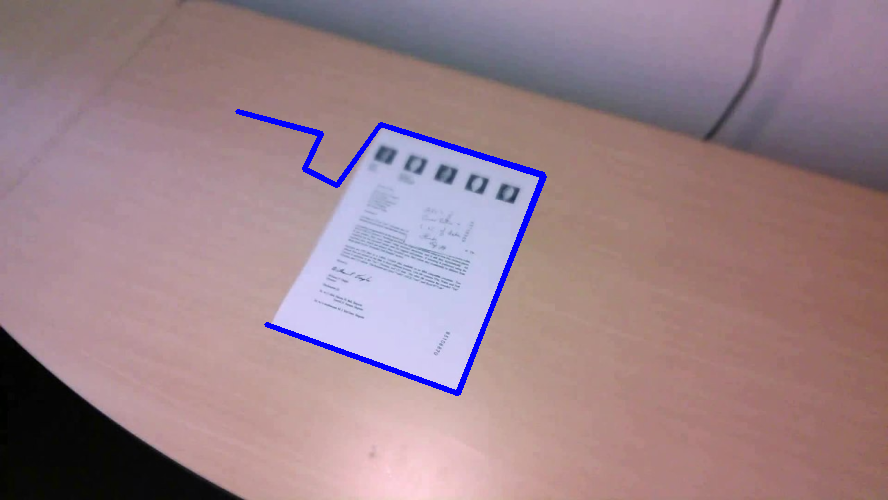

Вывод границ листа с фотографии crumpled_list.jpg


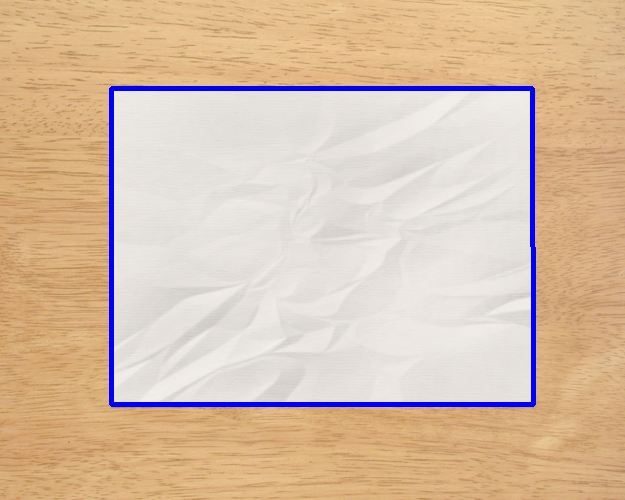

Вывод границ листа с фотографии list1.jpg


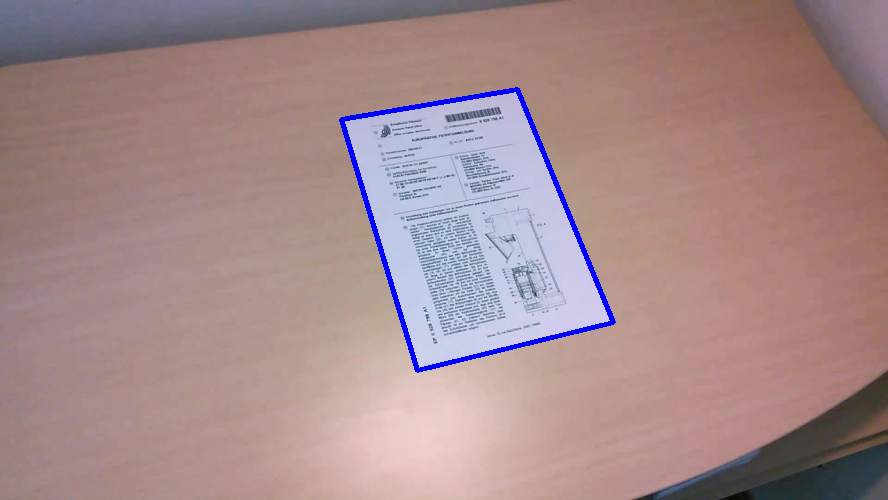

In [107]:
for img in img_names:
  draw_borders(img)